# Dimensionality Reduction with PCA

PCA stands for Pricipal Component Analysis.
Dimensionality reduction is motivated by several problems. First, it can be used to mitigate problems caused by the curse of dimensionality. Second, dimensionality reduction can be used to compress data while
minimizing the amount of information that is lost. Third, understanding the structure of data with hundreds of dimensions can be difficult; data with only two or three dimensions can be visualized easily.

## Curse of Dimensionality

The higher the number of dimensions (features) the more the sparse the data becomes or in other words, the higher the number of features more will be the data requirement! **DATA IS PRECIOUS**

![Curse of Dimensionality](http://cleverowl.uk/wp-content/uploads/2016/02/pca_1d_2d_3d.png)

PCA helps us to project high dimensional data on a few dimension thus helping us to determine:
a) The most important dimension/ the most important component of variation
b) Helps reducing the data dimension, it does not help as a measure of underfitting.


### How PCA works?

PCA reduces the dimensions of a data set by projecting the data onto a
lower-dimensional subspace. For example, a two dimensional data set could be reduced by projecting the points onto a line; each instance in the data set would then be represented by a single value rather than a pair of values. A three-dimensional dataset could be reduced to two dimensions by projecting the variables onto a plane.
In general, an n-dimensional dataset can be reduced by projecting the dataset onto a k-dimensional subspace, where k is less than n. More formally, PCA can be used to find a set of vectors that span a subspace, which minimizes the sum of the squared errors of the projected data. This projection will retain the greatest proportion of the original data set's variance.

### Pre-reqs of understanding PCA
 - Variance and Co-variance
 - Eigenvectors and eigenvalues
 
 
#### NOTE: 
Eigenvectors and eigenvalues can only be derived from square matrices, and not all square matrices have eigenvectors or eigenvalues. If a matrix does have eigenvectors and eigenvalues, it will have a pair for each of its dimensions. The principal components of a matrix are the eigenvectors of its covariance matrix, ordered by their corresponding eigenvalues. The eigenvector with the greatest eigenvalue is the first principal component; the second principal component is the eigenvector with the second greatest eigenvalue, and so on.
 

In [41]:
import numpy as np

a = np.array([[0.9, 1],
             [2.4, 2.6],
             [1.2, 1.7],
             [0.5, -0.7],
             [0.3, -0.7],
             [1.8, 1.4],
             [0.5, 0.6],
             [0.3, 0.6],
             [2.5, 2.6],
             [1.3, 1.1]])

cov_a = np.cov(a.T)
#WE TRANSPOSE BECAUSE ALGORITHM IS DESIGNED TO DETERMINE COVARIANCE ALONG
#ROW, SO THE NUMBER OF ROWS ARE CONSIDERED AS NUMBER OF VARIABLES AND
#NOT CONSIDERED AS NUMBER OF DATA-POINTS
eigenval, vec = np.linalg.eig(cov_a)
reduced_mat = a.dot(vec[:,0])

print reduced_mat.shape
print a.shape

#one dimension less

(10,)
(10, 2)


Many implementations of PCA, including the one of scikit-learn, use singular value decomposition to calculate the eigenvectors and eigenvalues. SVD is given by the following equation:
![equation](https://carlmorphet.files.wordpress.com/2014/02/svd-equation.png?w=594)

The columns of S are called left singular vectors of the data matrix, the columns of U are its right singular vectors, and the diagonal entries of are its singular values.
While the singular vectors and values of a matrix are useful in some applications of signal processing and statistics, we are only interested in them as they relate to the eigenvectors and eigenvalues of the data matrix. Specifically, the left singular vectors are the eigenvectors of the covariance matrix and the diagonal elements of ∑ are the square roots of the eigenvalues of the covariance matrix.

## Using PCA to visualize high-dimensional data

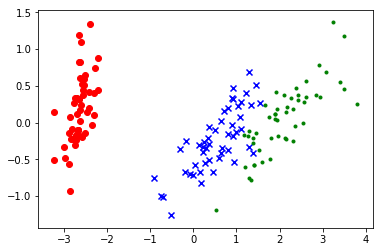

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

data = load_iris()
y = data.target
X = data.data

pca = PCA(n_components = 2)
reduced_X = pca.fit_transform(X)


red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i]== 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i]==1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, color='r', marker='o')
plt.scatter(blue_x, blue_y, color='b', marker='x')
plt.scatter(green_x, green_y, color='g', marker ='.')

plt.show()

## Face Recognition with PCA

Face recognition is the supervised classification task of identifying a person from an image of his or her face. In this example, we will use a data set called Our Database of Faces from AT&T Laboratories, Cambridge. The data set contains ten images each of forty people.
The images were created under different lighting conditions, and the subjects varied their facial expressions. The images are gray scale and 92 x 112 pixels in dimension.

While these images are small, a feature vector that encodes the intensity of every pixel will have 10,304 dimensions. Training from such high-dimensional data could require many samples to avoid over-fitting. Instead, we will use PCA to compactly represent the images in terms of a small number of principal components.

We can reshape the matrix of pixel intensities for an image into a vector, and create a matrix of these vectors for all of the training images. Each image is a linear combination of this data set's principal components. In the context of face recognition, these principal components are called eigenfaces. The eigenfaces can be thought of as standardized components of faces. Each face in the data set can be expressed as some combination of the eigenfaces, and can be approximated as a combination of the most important eigenfaces.

(100, 150) (300, 150)


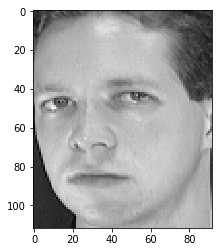

In [69]:
from os import walk, path
import numpy as np
import mahotas as mh
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = []
y = []


for dir_path, dir_names, file_names in walk('orl_faces'):
    for fn in file_names:
        if fn[-3:] == 'pgm':
            image_filename = path.join(dir_path, fn)
            X.append(scale(mh.imread(image_filename, 
                                     as_grey = True).reshape(-1,).astype(np.float32)))
            y.append(dir_path)
X = np.array(X)

plt.imshow(X[0].reshape(112,-1), cmap='gray')

X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=150)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


print X_test_reduced.shape, X_train_reduced.shape

In [70]:
classifier = LogisticRegression()

accuracies = cross_val_score(classifier, X_train_reduced, y_train)

print 'Cross validation Accuracy: ', np.mean(accuracies)

Cross validation Accuracy:  0.789991840065


In [71]:
classifier.fit(X_train_reduced, y_train)
prediction = classifier.predict(X_test_reduced)
print classification_report(y_test, prediction)


               precision    recall  f1-score   support

 orl_faces/s1       1.00      0.67      0.80         3
orl_faces/s10       1.00      1.00      1.00         1
orl_faces/s11       1.00      1.00      1.00         3
orl_faces/s12       0.67      1.00      0.80         2
orl_faces/s13       1.00      1.00      1.00         2
orl_faces/s14       1.00      1.00      1.00         2
orl_faces/s15       1.00      1.00      1.00         3
orl_faces/s16       0.00      0.00      0.00         1
orl_faces/s17       1.00      1.00      1.00         3
orl_faces/s18       1.00      1.00      1.00         2
orl_faces/s19       1.00      1.00      1.00         1
 orl_faces/s2       1.00      1.00      1.00         4
orl_faces/s20       1.00      1.00      1.00         3
orl_faces/s21       1.00      1.00      1.00         3
orl_faces/s22       1.00      1.00      1.00         1
orl_faces/s23       0.33      1.00      0.50         1
orl_faces/s25       1.00      1.00      1.00         2
orl_faces

/home/prakhar/Desktop/scikit/venv/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
